In [1]:
# Assigment 5
# 

# Initialisation of libraries 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gnerate_vel_and_ac(exp, var, T, V0, numb):
    arr = np.zeros(numb)
    a = np.random.normal(exp, var ** 0.5, numb)
    arr[0] = V0
    for i in range(1, len(arr)):
        arr[i] = arr[i - 1] + a[i - 1] * T
    return arr, a
def generate_x(T, X0, a, v):
    arr = np.zeros(len(a))
    arr[0] = X0
    for i in range(1, len(a)):
        arr[i] = arr[i - 1] + v[i - 1] * T + a[i - 1] * (T ** 2) / 2
    return arr

In [35]:
# PART 1
x0 = 5
v0 = 1
T = 1
sigmaa_2 = 200 ** 2
numb = 200
v,a = gnerate_vel_and_ac(0, sigmaa_2 ** 0.5, T, v0, numb)
x = generate_x(T, x0, a, v)

In [36]:
sigmaeta_2 = 20 ** 2
eta = np.random.normal(0, sigmaeta_2 ** 0.5, 200)
z = x + eta

In [37]:
F = np.array([[1, T], [0, 1]])
G = np.array([T ** 2 / 2, T])
H = np.array([1, 0])

In [38]:
X = np.zeros([200, 2])
X[0] = np.array([x[0], v[0]])
for i in range(1, len(X)):
    X[i] = np.dot(F, X[i - 1]) + np.dot(G, a[i - 1])

In [39]:
for i in range(len(x)):
    z[i] = np.dot(H, X[i]) + eta[i]

In [40]:
X_pred = np.zeros([200, 2])
P_pred = np.zeros([200, 2, 2])
Q = np.dot(np.dot(G, G.transpose()), sigmaa_2)
R = sigmaeta_2

Q = 0

X_pred[0] = np.array([2, 0])
P_pred[0] = np.array([[10000, 0], [0, 10000]])

#Prediction
for i in range(1, len(X_pred)):
    X_pred[i] = np.dot(F, X_pred[i - 1])
    P_pred[i] = np.dot(np.dot(F, P_pred[i - 1]), F.transpose()) + Q


In [53]:
#Filtration
X_filt = np.zeros([200, 2])
P_filt = np.zeros([200, 2])
K = np.zeros([200, 2])

for i in range(len(K)):
    K[i] = np.dot(np.dot(P_pred[i], H.transpose()), ((np.dot(np.dot(H, P_pred[i]), H.transpose()) + R)**(-1)))

for i in range(len(X)):
    X_filt[i] = X_pred[i] + np.dot(K[i], (z[i] - np.dot(H, X_pred[i])))

In [54]:
Q

0

In [55]:
np.dot(K[5], (z[5] - np.dot(H, X_pred[5])))

array([168.61281953,  32.42554222])

In [56]:
np.dot(H, X_pred[5])

2.0

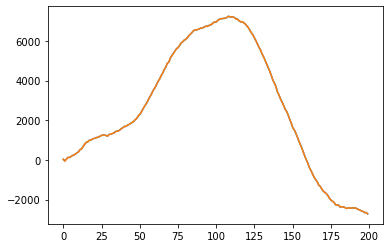

In [57]:
plt.plot(X_filt[:,0])
plt.plot(z)